This script allows for plotting all spiral vertical profiles on a single figure, while highlighting specific spirals as a part of MCS region, type, etc...

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
import xarray as xr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

warnings.filterwarnings("ignore",message='invalid value encountered in less_equal')

%matplotlib inline

In [2]:
savePath = '/Users/danstechman/GoogleDrive/School/Research/PECAN/Microphysics/plots/vertical_profiles'
fType = 'pdf'

noDispSave = False

fNameAppnd = '_ESR-RIJ-hlght'
# fNameAppnd = '_TZ-hlght'
# fNameAppnd = '_ESR-hlght'
# fNameAppnd = '_AR-hlght'

plotRH         = True
plotNt         = True
plotTWC        = True
plotDmm        = True
plotARat       = True
plotRE         = True

plotFL_RHtemp  = True
plotFL_TempAlt = True
plotFL_WSAlt   = True
plotFL_WStemp  = True


# flights = ['20150617','20150620','20150701','20150702','20150706','20150709']
flights = ['20150620']

In [3]:
tempLim = (-18.5,22)
rhLim   = (0,120)
NtLim   = (1e-6,1)
twcLim  = (1e-5,10)
DmmLim  = (0,5) #** Outliers (otherwise upper-end can be ~2.5)
ARatLim = (0.2,0.85)
reLim   = (0.01,0.19) #** Outliers (otherwise upper-end can be 0.12)
altLim  = (1200,7500)
wsLim   = (0,45)

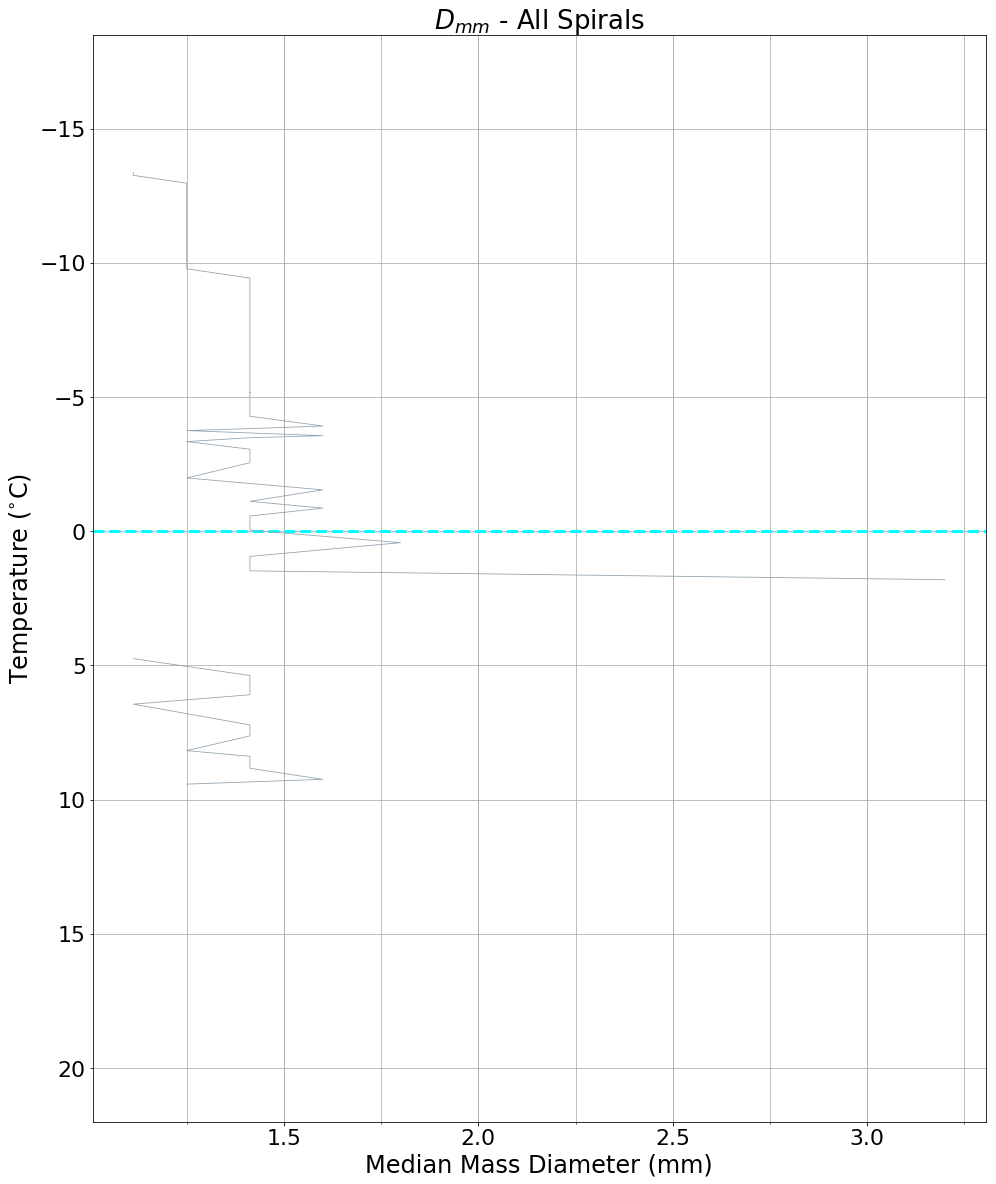

In [4]:
figSavePath = '{}/allSprls_singleFig'.format(savePath)
if not os.path.exists(figSavePath):
    os.makedirs(figSavePath)

    
if plotRH:
    fig, ax = plt.subplots(figsize=(16,20))
    ax.axhline(y=0,color='cyan',linestyle='--',linewidth=3)
    ax.axvline(x=100,color='#536872',linestyle='--',linewidth=3)

if plotNt:
    fig2, ax2 = plt.subplots(figsize=(16,20))
    ax2.axhline(y=0,color='cyan',linestyle='--',linewidth=3)

if plotTWC:
    fig3, ax3 = plt.subplots(figsize=(16,20))
    ax3.axhline(y=0,color='cyan',linestyle='--',linewidth=3)

if plotDmm:
    fig4, ax4 = plt.subplots(figsize=(16,20))
    ax4.axhline(y=0,color='cyan',linestyle='--',linewidth=3)

if plotARat:
    fig5, ax5 = plt.subplots(figsize=(16,20))
    ax5.axhline(y=0,color='cyan',linestyle='--',linewidth=3)

if plotRE:
    fig6, ax6 = plt.subplots(figsize=(16,20))
    ax6.axhline(y=0,color='cyan',linestyle='--',linewidth=3)

if plotFL_RHtemp:
    fig7, ax7 = plt.subplots(figsize=(16,20))
    ax7.axhline(y=0,color='cyan',linestyle='--',linewidth=3)
    ax7.axvline(x=100,color='#536872',linestyle='--',linewidth=3)

if plotFL_TempAlt:
    fig8, ax8 = plt.subplots(figsize=(16,20))
    ax8.axhline(y=0,color='cyan',linestyle='--',linewidth=3)

if plotFL_WSAlt:
    fig9, ax9 = plt.subplots(figsize=(16,20))
    ax9.axhline(y=0,color='cyan',linestyle='--',linewidth=3)

if plotFL_WStemp:
    fig10, ax10 = plt.subplots(figsize=(16,20))
    ax10.axhline(y=0,color='cyan',linestyle='--',linewidth=3)

    
for flight in flights:

    cipFile = '/Users/danstechman/GoogleDrive/PECAN-Data/mp-data/' + flight + '/' + flight + '_CIPfit-spirals-10s1sAvg.nc'
    flFile = '/Users/danstechman/GoogleDrive/PECAN-Data/FlightLevelData/Processed/' + flight + '_FltLvl_Processed.nc'
    pecanPrmF = '/Users/danstechman/GoogleDrive/PECAN-Data/' + flight + '_PECANparams.nc'
    
    # Pull out any PECAN parameters
    pecanPrms = xr.open_dataset(pecanPrmF,decode_times=False)
    startT = pecanPrms.startT.data
    endT = pecanPrms.endT.data
    
    # Pull out FL data
    flData = xr.open_dataset(flFile,decode_times=False)
    timeSecs_FL = flData.time_secs_FL.data
    fl_tempC = flData.TA.data
    fl_rh = flData.RH_hybrid.data
    fl_alt_mMSL = flData.Alt.data
    fl_windSpd_ms = flData.windSpd.data

    # Pull out any global variables/attributes from the netcdf file
    cipData_root = xr.open_dataset(cipFile)
    sprlZone = str(cipData_root.sprlZone.data,'utf-8')
    mcsType = str(cipData_root.mcsType.data,'utf-8')
    numSprls = len(sprlZone)

    # Loop over each spiral for the current flight
#     for ix in np.arange(0,numSprls):
    for ix in np.arange(5,6):
        cipData = xr.open_dataset(cipFile,group='spiral_' + str(ix+1))

        # Get start and end indices for FL variables within current spiral
        strtMatch = min(timeSecs_FL, key=lambda x: abs(x - startT[ix]))
        endMatch = min(timeSecs_FL, key=lambda x: abs(x - endT[ix]))
        flStrtIx = np.squeeze(np.where(timeSecs_FL == strtMatch))
        flEndIx = np.squeeze(np.where(timeSecs_FL == endMatch))
        
        tempC = cipData.tempC_10s.data
        rh = cipData.rh_10s.data
        Nt = cipData.cipNt_hybrid_igf.data
        twc = cipData.cipTWC_hybrid_igf_mlr.data
        Dmm = cipData.cipDmm_hybrid_igf_mlr.data
        ar = cipData.areaRatio_10s.data
        re = (cipData.efctvRadius_10s_mlr.data)/1000 # um to mm
        
        twc[twc == 0] = np.nan
        Nt[Nt == 0] = np.nan
        Dmm[Dmm == 0] = np.nan
        
            
        if sprlZone[ix] == 'T':
            traceCol = '#91a3b0'
#             traceCol = 'black'
            lwdth = 0.8
            zo = 5
            alph = 0
        if sprlZone[ix] == 'S':
            traceCol = '#91a3b0'
#             traceCol = 'black'
            lwdth = 0.8
            zo = 5
            alph = 1
        if sprlZone[ix] == 'A':
            traceCol = '#91a3b0'
#             traceCol = 'black'
            lwdth = 0.8
            zo = 5
            alph = 0
        

        # RIJ spirals (all but #3 and #6 from 20 June)
        # (Remember that ix is 0-based, i.e., ix=2 is actually spiral 3)
        if flight == '20150620':
            if ix in [0,1]:
                traceCol = 'blue'
                lwdth = 4
                zo = 50
                alph = 1
            elif ix in [3,4,6]:
                traceCol = 'black'
                lwdth = 4
                zo = 50
                alph = 1

            
        if plotRH:
            ax.plot(rh,tempC,color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)
            
        if plotNt:
            ax2.plot(Nt,tempC,color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)

        if plotTWC:
            ax3.plot(twc,tempC,color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)

        if plotDmm:
            ax4.plot(Dmm,tempC,color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)

        if plotARat:
            ax5.plot(ar,tempC,color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)

        if plotRE:
            ax6.plot(re,tempC,color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)
            
            
        if plotFL_RHtemp:
            ax7.plot(fl_rh[flStrtIx:flEndIx],fl_tempC[flStrtIx:flEndIx],color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)
   
        if plotFL_TempAlt:
            ax8.plot(fl_tempC[flStrtIx:flEndIx],fl_alt_mMSL[flStrtIx:flEndIx],color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)
      
        if plotFL_WSAlt:
            ax9.plot(fl_windSpd_ms[flStrtIx:flEndIx],fl_alt_mMSL[flStrtIx:flEndIx],color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)
      
        if plotFL_WStemp:
            ax10.plot(fl_windSpd_ms[flStrtIx:flEndIx],fl_tempC[flStrtIx:flEndIx],color=traceCol,alpha=alph,linewidth=lwdth,zorder=zo)

            
          
if plotRH:           
    ax.set_ylim(tempLim)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Humidity (%)',fontsize=24)
    ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.set_title('RH - All Spirals',fontsize=26)
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.grid(which='both')
    if noDispSave:
        saveStr = '{}/RH_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig.savefig(saveStr,bbox_inches='tight')

if plotNt:
    ax2.set_ylim(tempLim)
    ax2.invert_yaxis()
    ax2.set_xscale('log',nonposx='mask')
    ax2.set_xlabel('Total Number Concentration ($cm^{-3}$)',fontsize=24)
    ax2.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax2.tick_params(axis='both', which='major', labelsize=22)
    ax2.set_title('$N_t$ - All Spirals',fontsize=26)
    ax2.grid(which='both')
    if noDispSave:
        saveStr2 = '{}/Nt_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig2.savefig(saveStr2,bbox_inches='tight')

if plotTWC:
    ax3.set_xscale('log',nonposx='mask')
    ax3.set_ylim(tempLim)
    ax3.invert_yaxis()
    ax3.set_xlabel('Total Water Content ($g\ m^{-3}$)',fontsize=24)
    ax3.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax3.tick_params(axis='both', which='major', labelsize=22)
    ax3.set_title('TWC - All Spirals',fontsize=26)
    ax3.grid(which='both')
    if noDispSave:
        saveStr3 = '{}/TWC_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig3.savefig(saveStr3,bbox_inches='tight')

if plotDmm:
    ax4.set_ylim(tempLim)
    ax4.invert_yaxis()
    ax4.set_xlabel('Median Mass Diameter (mm)',fontsize=24)
    ax4.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax4.tick_params(axis='both', which='major', labelsize=22)
    ax4.set_title('$D_{{mm}}$ - All Spirals',fontsize=26)
    ax4.xaxis.set_minor_locator(MultipleLocator(0.25))
    ax4.grid(which='both')
    if noDispSave:
        saveStr4 = '{}/Dmm_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig4.savefig(saveStr4,bbox_inches='tight')

if plotARat:
    ax5.set_ylim(tempLim)
    ax5.invert_yaxis()
    ax5.set_xlabel('Area Ratio (%)',fontsize=24)
    ax5.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax5.tick_params(axis='both', which='major', labelsize=22)
    ax5.set_title('Area Ratio - All Spirals',fontsize=26)
    ax5.xaxis.set_minor_locator(MultipleLocator(0.05))
    ax5.grid(which='both')
    if noDispSave:
        saveStr5 = '{}/ARatio_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig5.savefig(saveStr5,bbox_inches='tight')

if plotRE:
    ax6.set_ylim(tempLim)
    ax6.invert_yaxis()
    ax6.set_xlabel('Effective Radius (mm)',fontsize=24)
    ax6.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax6.tick_params(axis='both', which='major', labelsize=22)
    ax6.set_title('$R_e$ - All Spirals',fontsize=26)
    ax6.xaxis.set_minor_locator(MultipleLocator(0.01))
    ax6.grid(which='both')
    if noDispSave:
        saveStr6 = '{}/RE_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig6.savefig(saveStr6,bbox_inches='tight')
        
        
if plotFL_RHtemp:
    ax7.set_ylim(tempLim)
    ax7.invert_yaxis()
    ax7.set_xlabel('Relative Humidity (%)',fontsize=24)
    ax7.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax7.tick_params(axis='both', which='major', labelsize=22)
    ax7.set_title('RH - All Spirals',fontsize=26)
    ax7.xaxis.set_minor_locator(MultipleLocator(10))
    ax7.grid(which='both')
    if noDispSave:
        saveStr7 = '{}/FL-RH-Temp_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig7.savefig(saveStr7,bbox_inches='tight')

if plotFL_TempAlt:
    ax8.set_xlim(tempLim)
    ax8.set_ylim(altLim)
    ax8.set_ylabel('Altitude (m MSL)',fontsize=24)
    ax8.set_xlabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax8.tick_params(axis='both', which='major', labelsize=22)
    ax8.set_title('Temperature - All Spirals',fontsize=26)
    ax8.xaxis.set_minor_locator(MultipleLocator(10))
    ax8.grid(which='both')
    if noDispSave:
        saveStr8 = '{}/FL-Temp-Alt_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig8.savefig(saveStr8,bbox_inches='tight')
    
if plotFL_WSAlt:
    ax9.set_ylim(altLim)
    ax9.set_ylabel('Altitude (m MSL)',fontsize=24)
    ax9.set_xlabel('Wind Speed ($m\ s^{-1}$)',fontsize=24)
    ax9.tick_params(axis='both', which='major', labelsize=22)
    ax9.set_title('Wind Speed - All Spirals',fontsize=26)
    ax9.xaxis.set_minor_locator(MultipleLocator(10))
    ax9.grid(which='both')
    if noDispSave:
        saveStr9 = '{}/FL-WS-Alt_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig9.savefig(saveStr9,bbox_inches='tight')

if plotFL_WStemp:
    ax10.set_ylim(tempLim)
    ax10.invert_yaxis()
    ax10.set_xlabel('Wind Speed ($m\ s^{-1}$)',fontsize=24)
    ax10.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax10.tick_params(axis='both', which='major', labelsize=22)
    ax10.set_title('Wind Speed - All Spirals',fontsize=26)
    ax10.xaxis.set_minor_locator(MultipleLocator(10))
    ax10.grid(which='both')
    if noDispSave:
        saveStr10 = '{}/FL-WS-Temp_AllSprls{}.{}'.format(figSavePath,fNameAppnd,fType)
        fig10.savefig(saveStr10,bbox_inches='tight')

if noDispSave:
    plt.close('all')

In [5]:
Dmm

array([1.1125, 1.1125, 1.25  , 1.25  , 1.25  , 1.25  , 1.25  , 1.25  ,
       1.25  , 1.4125, 1.4125, 1.4125, 1.4125, 1.4125, 1.4125, 1.4125,
       1.4125, 1.4125, 1.4125, 1.4125, 1.4125, 1.6   , 1.4125, 1.25  ,
       1.6   , 1.4125, 1.25  , 1.4125, 1.4125, 1.25  , 1.6   , 1.4125,
       1.6   , 1.4125, 1.4125, 1.8   , 1.4125, 1.4125, 3.2   ,    nan,
          nan,    nan,    nan,    nan,    nan,    nan, 1.1125, 1.4125,
       1.4125, 1.1125, 1.4125, 1.4125, 1.25  , 1.4125, 1.4125, 1.6   ,
       1.25  ])

In [7]:
np.mean([1.1125, 1.1125, 1.25  , 1.25  , 1.25  , 1.25  , 1.25  , 1.25  ,
       1.25  , 1.4125, 1.4125, 1.4125, 1.4125, 1.4125, 1.4125, 1.4125,
       1.4125, 1.4125, 1.4125, 1.4125, 1.4125, 1.6   , 1.4125, 1.25  ,
       1.6   , 1.4125, 1.25  , 1.4125, 1.4125, 1.25  , 1.6   , 1.4125,
       1.6   , 1.4125, 1.4125, 1.8   , 1.4125, 1.4125, 3.2])

1.4304487179487182